# Long Short-Term Memory (LSTM)

## What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

worth watching: https://www.youtube.com/watch?v=b61DPVFX03I&t=329s

## Our LSTM Implementation:

Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.lstm as lstm
import src.test_bench as bench

Powering on test bench
testing metric='node_mem', app='node_mem'.
Fetching data for metric='node_mem', app='node_mem'.
Amount of train data is 768
Amount of test data is 191
Making an instance of the class we want to test
LSTMPredictor(
  (model): ModuleDict(
    (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
    (linear): Linear(in_features=32, out_features=1, bias=True)
  )
)
pad = -2
batch_size = 100
num_epochs = 1000
learning_rate = 0.005
Starting training loop
Epoch: 1 / 1000
loss of batch 0 / 8: 0.04735033857415745
loss of batch 1 / 8: 0.05283487416104181
loss of batch 2 / 8: 0.013198443838381702
loss of batch 3 / 8: 0.027497541395577144
loss of batch 4 / 8: 0.0359477085111338
loss of batch 5 / 8: 0.024806766826390055
loss of batch 6 / 8: 0.01616305087572622
loss of batch 7 / 8: 0.019903502239397235
Plotting prediction for some random sample in the test set.


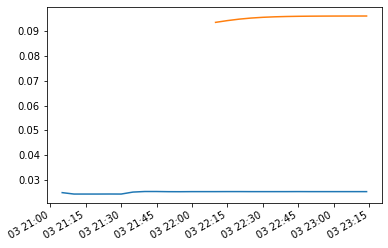

MSE of this prediction is: 0.004939203235135672
Epoch: 2 / 1000
loss of batch 0 / 8: 0.017998760684043758
loss of batch 1 / 8: 0.037574298215195694
loss of batch 2 / 8: 0.012811511860511661
loss of batch 3 / 8: 0.020344552468265466
loss of batch 4 / 8: 0.02692069053508382
loss of batch 5 / 8: 0.014555086798446703
loss of batch 6 / 8: 0.013008135349904594
loss of batch 7 / 8: 0.016682155466093276
Plotting prediction for some random sample in the test set.


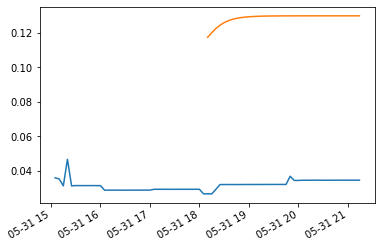

MSE of this prediction is: 0.009131202644226172
Epoch: 3 / 1000
loss of batch 0 / 8: 0.01366059230573211
loss of batch 1 / 8: 0.024096667198445703
loss of batch 2 / 8: 0.009668934825966898
loss of batch 3 / 8: 0.014563234561057075
loss of batch 4 / 8: 0.015649795829764175
loss of batch 5 / 8: 0.010599425494308399
loss of batch 6 / 8: 0.005877630753784947
loss of batch 7 / 8: 0.0029737318584474475
Plotting prediction for some random sample in the test set.


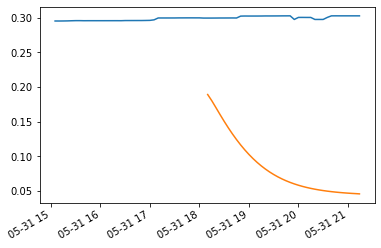

MSE of this prediction is: 0.04869920982453215
Epoch: 4 / 1000
loss of batch 0 / 8: 0.004426983404383364
loss of batch 1 / 8: 0.007649812024824478
loss of batch 2 / 8: 0.004915259474741358
loss of batch 3 / 8: 0.005433307864725269
loss of batch 4 / 8: 0.003966832014079411
loss of batch 5 / 8: 0.002068696631089937
loss of batch 6 / 8: 0.0020761777119046895
loss of batch 7 / 8: 0.0016079762573208518
Plotting prediction for some random sample in the test set.


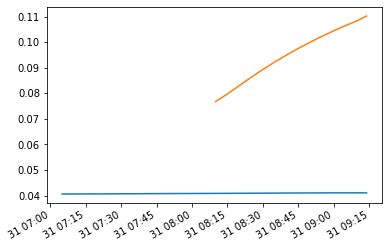

MSE of this prediction is: 0.0030418848746028284
Epoch: 5 / 1000
loss of batch 0 / 8: 0.0025105591559162316
loss of batch 1 / 8: 0.003749621137456094
loss of batch 2 / 8: 0.0017697096209684628
loss of batch 3 / 8: 0.002978359564912167
loss of batch 4 / 8: 0.0031237488678120748
loss of batch 5 / 8: 0.0013911691696177726
loss of batch 6 / 8: 0.0014026031163025786
loss of batch 7 / 8: 0.0011848696017963908
Plotting prediction for some random sample in the test set.


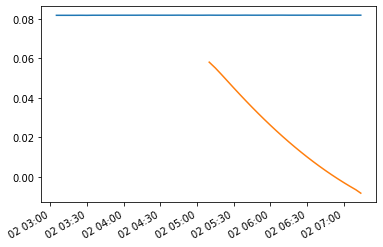

MSE of this prediction is: 0.004082548853360019
Epoch: 6 / 1000
loss of batch 0 / 8: 0.001804615920674402
loss of batch 1 / 8: 0.0018499776433751373
loss of batch 2 / 8: 0.001351220690181237
loss of batch 3 / 8: 0.002099141955170735
loss of batch 4 / 8: 0.0019219086921906214
loss of batch 5 / 8: 0.0009945057884151222
loss of batch 6 / 8: 0.0010908567703222232
loss of batch 7 / 8: 0.0008151218766268595
Plotting prediction for some random sample in the test set.


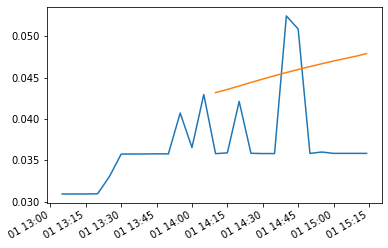

MSE of this prediction is: 8.52655705934191e-05
Epoch: 7 / 1000
loss of batch 0 / 8: 0.001265914473029291
loss of batch 1 / 8: 0.0017965079681741601
loss of batch 2 / 8: 0.0007707485140781178
loss of batch 3 / 8: 0.001536577170483061
loss of batch 4 / 8: 0.0016734012040238904
loss of batch 5 / 8: 0.0008303078300733488
loss of batch 6 / 8: 0.0008957990987633354
loss of batch 7 / 8: 0.0007177975361738236
Plotting prediction for some random sample in the test set.


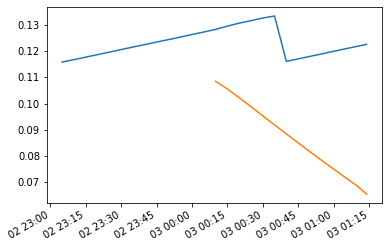

MSE of this prediction is: 0.0015233711011330396
Epoch: 8 / 1000
loss of batch 0 / 8: 0.0010759754758250658
loss of batch 1 / 8: 0.0011066064443495246
loss of batch 2 / 8: 0.0006608514372896507
loss of batch 3 / 8: 0.0012132927100354626
loss of batch 4 / 8: 0.0012380686793694276
loss of batch 5 / 8: 0.000680643941566931
loss of batch 6 / 8: 0.0007633454460081833
loss of batch 7 / 8: 0.000608786286722197
Plotting prediction for some random sample in the test set.


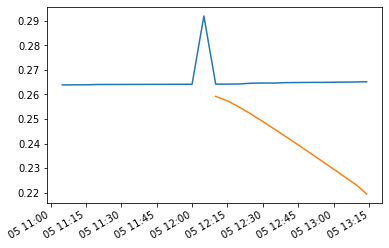

MSE of this prediction is: 0.0007530721704732008
Epoch: 9 / 1000
loss of batch 0 / 8: 0.000889507625191971
loss of batch 1 / 8: 0.0010021616889397875
loss of batch 2 / 8: 0.0005506176442317382
loss of batch 3 / 8: 0.001044179337671826
loss of batch 4 / 8: 0.0011011355048607969
loss of batch 5 / 8: 0.0006115111166585431
loss of batch 6 / 8: 0.0006940463497646022
loss of batch 7 / 8: 0.0005787871559279239
Plotting prediction for some random sample in the test set.


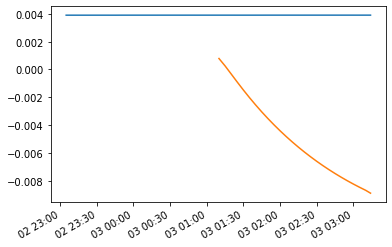

MSE of this prediction is: 8.62264004882528e-05
Epoch: 10 / 1000
loss of batch 0 / 8: 0.0008209124774707767
loss of batch 1 / 8: 0.0008294162150834717
loss of batch 2 / 8: 0.0005100481820872457
loss of batch 3 / 8: 0.0009384792410125573
loss of batch 4 / 8: 0.0009563305280732816
loss of batch 5 / 8: 0.0005364261964681036
loss of batch 6 / 8: 0.0006508376123365639
loss of batch 7 / 8: 0.0005303201421268114
Plotting prediction for some random sample in the test set.


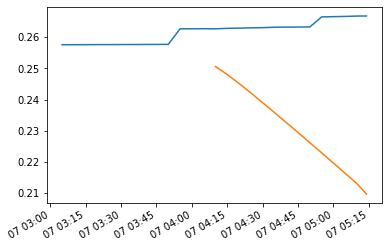

MSE of this prediction is: 0.001332143852816535
Epoch: 11 / 1000
loss of batch 0 / 8: 0.0007263962325172887
loss of batch 1 / 8: 0.0007751661154693283
loss of batch 2 / 8: 0.0005006401696328735
loss of batch 3 / 8: 0.0008678733988961167
loss of batch 4 / 8: 0.0008770267629431844
loss of batch 5 / 8: 0.0004964917615719695
loss of batch 6 / 8: 0.0006248759114045244
loss of batch 7 / 8: 0.0005038508249203156
Plotting prediction for some random sample in the test set.


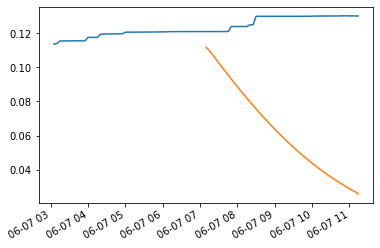

MSE of this prediction is: 0.005068991833315064
Epoch: 12 / 1000
loss of batch 0 / 8: 0.0006677932183188399
loss of batch 1 / 8: 0.0007116706838956294
loss of batch 2 / 8: 0.00047029499187459863
loss of batch 3 / 8: 0.000782009699772801
loss of batch 4 / 8: 0.0008049557509064803
loss of batch 5 / 8: 0.00046785761212675024
loss of batch 6 / 8: 0.0005774564053200058
loss of batch 7 / 8: 0.0004410839285684852
Plotting prediction for some random sample in the test set.


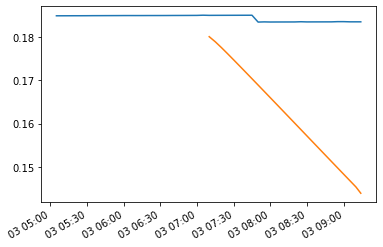

MSE of this prediction is: 0.0005852340197275153
Epoch: 13 / 1000
loss of batch 0 / 8: 0.0006119345063329024
loss of batch 1 / 8: 0.0006784968836906165
loss of batch 2 / 8: 0.0004375186720265337
loss of batch 3 / 8: 0.0007159465682395444
loss of batch 4 / 8: 0.000757537758854216
loss of batch 5 / 8: 0.0004400902876645676
loss of batch 6 / 8: 0.000532582128085621
loss of batch 7 / 8: 0.000404080844884436
Plotting prediction for some random sample in the test set.


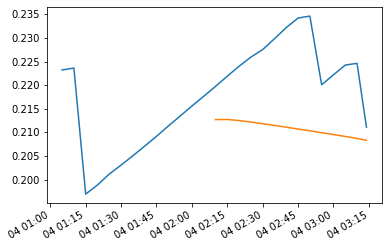

MSE of this prediction is: 0.00024085154541627265
Epoch: 14 / 1000
loss of batch 0 / 8: 0.000573505744356052
loss of batch 1 / 8: 0.0006292907147494167
loss of batch 2 / 8: 0.00038867428250635326
loss of batch 3 / 8: 0.0006555187909895241
loss of batch 4 / 8: 0.0007138780774876886
loss of batch 5 / 8: 0.00040641376833517787
loss of batch 6 / 8: 0.00048088125822888235
loss of batch 7 / 8: 0.0003653150943922173
Plotting prediction for some random sample in the test set.


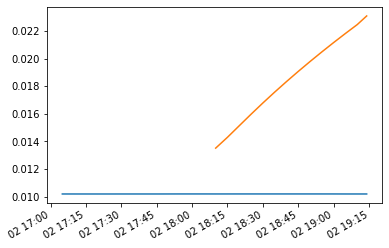

MSE of this prediction is: 7.84064377854305e-05
Epoch: 15 / 1000
loss of batch 0 / 8: 0.0005339610343001771
loss of batch 1 / 8: 0.0005841768379055223
loss of batch 2 / 8: 0.0003523459772296045
loss of batch 3 / 8: 0.0006081160173398817
loss of batch 4 / 8: 0.0006610806077283118
loss of batch 5 / 8: 0.0003764947110900252
loss of batch 6 / 8: 0.0004419609104027027
loss of batch 7 / 8: 0.00034156917241910434
Plotting prediction for some random sample in the test set.


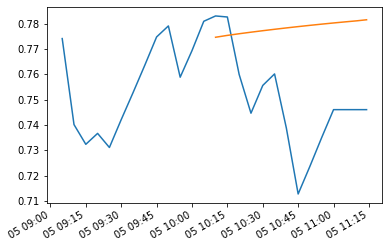

MSE of this prediction is: 0.001290427366365334
Epoch: 16 / 1000
loss of batch 0 / 8: 0.0004976096431924901
loss of batch 1 / 8: 0.0005408090862062961
loss of batch 2 / 8: 0.0003219599260155246
loss of batch 3 / 8: 0.000564656240517163
loss of batch 4 / 8: 0.0006154781250398732
loss of batch 5 / 8: 0.00034852390045744954
loss of batch 6 / 8: 0.0004071203429913635
loss of batch 7 / 8: 0.0003158077012726246
Plotting prediction for some random sample in the test set.


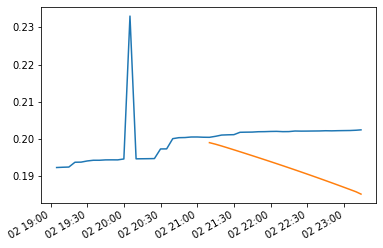

MSE of this prediction is: 0.00011101971918004463
Epoch: 17 / 1000
loss of batch 0 / 8: 0.0004616240592651865
loss of batch 1 / 8: 0.0005022133650999883
loss of batch 2 / 8: 0.0002972944235471601
loss of batch 3 / 8: 0.000523737086757045
loss of batch 4 / 8: 0.0005680792490968694
loss of batch 5 / 8: 0.0003239655469353647
loss of batch 6 / 8: 0.0003767033700023405
loss of batch 7 / 8: 0.00029301897271755964
Plotting prediction for some random sample in the test set.


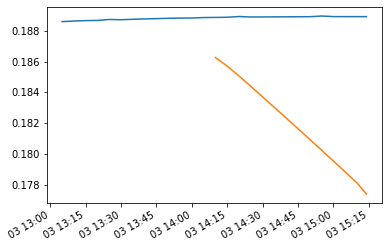

MSE of this prediction is: 5.6252842153460394e-05
Epoch: 18 / 1000
loss of batch 0 / 8: 0.0004280547822507946
loss of batch 1 / 8: 0.0004680972832235442
loss of batch 2 / 8: 0.00027555742705406096
loss of batch 3 / 8: 0.00048513741391903773
loss of batch 4 / 8: 0.0005268359159877694
loss of batch 5 / 8: 0.00030097635506117604
loss of batch 6 / 8: 0.0003485993234133175
loss of batch 7 / 8: 0.00027180933033903464
Plotting prediction for some random sample in the test set.


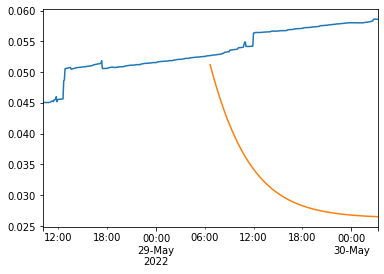

MSE of this prediction is: 0.0006695747254868152
Epoch: 19 / 1000
loss of batch 0 / 8: 0.00039688628313710604
loss of batch 1 / 8: 0.0004346833265245791
loss of batch 2 / 8: 0.0002551234131618863
loss of batch 3 / 8: 0.0004483422265770806
loss of batch 4 / 8: 0.00048807893988680144
loss of batch 5 / 8: 0.0002792153262049109
loss of batch 6 / 8: 0.00032180337259045465
loss of batch 7 / 8: 0.000250790949312775
Plotting prediction for some random sample in the test set.


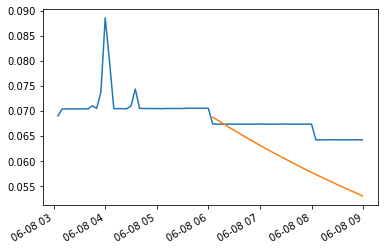

MSE of this prediction is: 4.8126195823771606e-05
Epoch: 20 / 1000
loss of batch 0 / 8: 0.00036707403978887635
loss of batch 1 / 8: 0.00040385073105726467
loss of batch 2 / 8: 0.00023574751339017533
loss of batch 3 / 8: 0.0004135397952667395
loss of batch 4 / 8: 0.0004512885624901435
loss of batch 5 / 8: 0.00025868020483629654
loss of batch 6 / 8: 0.0002966693634583357
loss of batch 7 / 8: 0.00023171545265349762
Plotting prediction for some random sample in the test set.


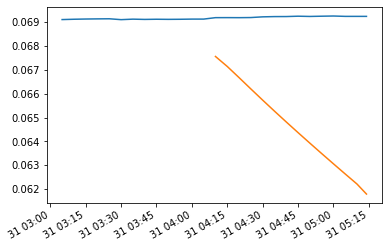

MSE of this prediction is: 2.435137250032665e-05
Epoch: 21 / 1000
loss of batch 0 / 8: 0.0003391736492011727
loss of batch 1 / 8: 0.0003742952650556509
loss of batch 2 / 8: 0.00021726005609963136
loss of batch 3 / 8: 0.00038077055878090187
loss of batch 4 / 8: 0.0004168557550086108
loss of batch 5 / 8: 0.00023931442134771035
loss of batch 6 / 8: 0.0002729945024518031
loss of batch 7 / 8: 0.00021372812894435942
Plotting prediction for some random sample in the test set.


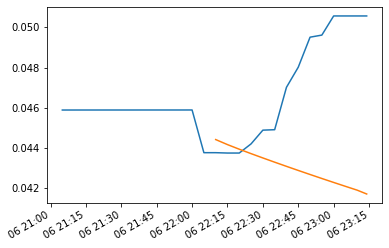

MSE of this prediction is: 3.1307239211200554e-05
Epoch: 22 / 1000
loss of batch 0 / 8: 0.00031291559293901807
loss of batch 1 / 8: 0.0003463744352853366
loss of batch 2 / 8: 0.00020016353811187028
loss of batch 3 / 8: 0.00035022077654166375
loss of batch 4 / 8: 0.00038405311827904956
loss of batch 5 / 8: 0.00022129725497335723
loss of batch 6 / 8: 0.00025109851344654483
loss of batch 7 / 8: 0.0001969911216224784
Plotting prediction for some random sample in the test set.


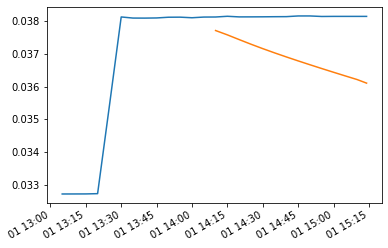

MSE of this prediction is: 1.861427310780055e-06
Epoch: 23 / 1000
loss of batch 0 / 8: 0.00028834991314828466
loss of batch 1 / 8: 0.0003205703377247036
loss of batch 2 / 8: 0.0001846795293176618
loss of batch 3 / 8: 0.00032186833122772727
loss of batch 4 / 8: 0.00035359617586542646
loss of batch 5 / 8: 0.00020461941474623214
loss of batch 6 / 8: 0.00023097230104185344
loss of batch 7 / 8: 0.00018172480115326788
Plotting prediction for some random sample in the test set.


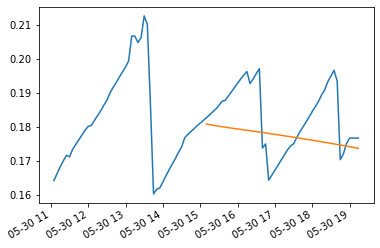

MSE of this prediction is: 0.00011297057505238274
Epoch: 24 / 1000
loss of batch 0 / 8: 0.0002656568105825662
loss of batch 1 / 8: 0.0002965768251504427
loss of batch 2 / 8: 0.00017057666333779488
loss of batch 3 / 8: 0.0002956363895768325
loss of batch 4 / 8: 0.0003256192037353334
loss of batch 5 / 8: 0.0001893187224778106
loss of batch 6 / 8: 0.00021246527787114957
loss of batch 7 / 8: 0.0001677372305894844
Plotting prediction for some random sample in the test set.


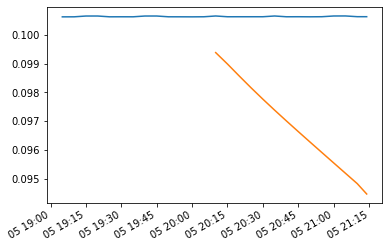

MSE of this prediction is: 1.6461849427494577e-05
Epoch: 25 / 1000
loss of batch 0 / 8: 0.00024477380682528995
loss of batch 1 / 8: 0.00027443015302447795
loss of batch 2 / 8: 0.00015774378552907146
loss of batch 3 / 8: 0.00027152933723994605
loss of batch 4 / 8: 0.0002997609985231826
loss of batch 5 / 8: 0.00017540034554955626
loss of batch 6 / 8: 0.00019556228733722016
loss of batch 7 / 8: 0.00015500592194323098
Plotting prediction for some random sample in the test set.


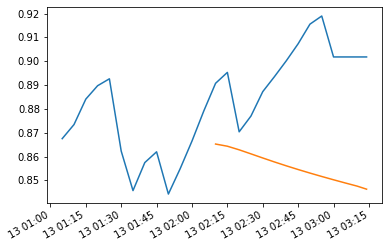

MSE of this prediction is: 0.0020440403037951895
Epoch: 26 / 1000
loss of batch 0 / 8: 0.00022563025101530272
loss of batch 1 / 8: 0.00025410565295489753
loss of batch 2 / 8: 0.00014620232772212007
loss of batch 3 / 8: 0.00024946856966359904
loss of batch 4 / 8: 0.000275982000636359
loss of batch 5 / 8: 0.00016274135607468132
loss of batch 6 / 8: 0.0001801660164144803
loss of batch 7 / 8: 0.00014346006116953465
Plotting prediction for some random sample in the test set.


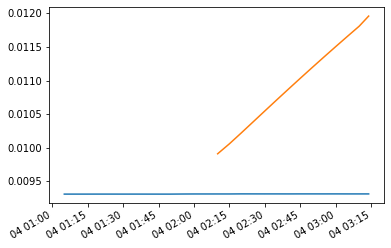

MSE of this prediction is: 3.0736522491966186e-06
Epoch: 27 / 1000
loss of batch 0 / 8: 0.00020810732347358387
loss of batch 1 / 8: 0.00023541490771034456
loss of batch 2 / 8: 0.00013579013518916935
loss of batch 3 / 8: 0.00022926575703807902
loss of batch 4 / 8: 0.0002542174008833907
loss of batch 5 / 8: 0.0001511900060884759
loss of batch 6 / 8: 0.00016607933130631343
loss of batch 7 / 8: 0.000132927816395111
Plotting prediction for some random sample in the test set.


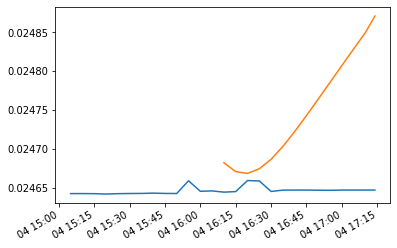

MSE of this prediction is: 1.4625586424029389e-08
Epoch: 28 / 1000
loss of batch 0 / 8: 0.00019201941129967802
loss of batch 1 / 8: 0.00021817518979748814
loss of batch 2 / 8: 0.00012628326141904208
loss of batch 3 / 8: 0.0002107074173580206
loss of batch 4 / 8: 0.00023419249718209824
loss of batch 5 / 8: 0.0001405861296162203
loss of batch 6 / 8: 0.0001531093144795931
loss of batch 7 / 8: 0.0001232297657488061
Plotting prediction for some random sample in the test set.


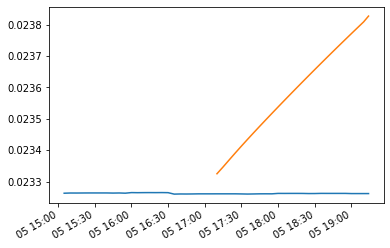

MSE of this prediction is: 1.2575450798428864e-07
Epoch: 29 / 1000
loss of batch 0 / 8: 0.00017716834686949898
loss of batch 1 / 8: 0.00020219139807699528
loss of batch 2 / 8: 0.00011753055354793387
loss of batch 3 / 8: 0.00019356751388214014
loss of batch 4 / 8: 0.00021567100728731302
loss of batch 5 / 8: 0.00013073749950106106
loss of batch 6 / 8: 0.0001410733280684331
loss of batch 7 / 8: 0.00011421609340489965
Plotting prediction for some random sample in the test set.


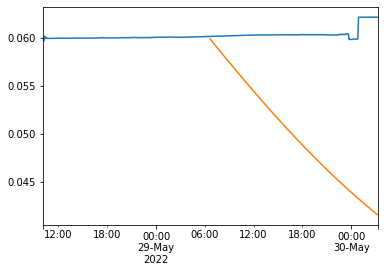

MSE of this prediction is: 0.0001389959092254267
Epoch: 30 / 1000
loss of batch 0 / 8: 0.00016335302369606622
loss of batch 1 / 8: 0.00018726618313386217
loss of batch 2 / 8: 0.00010937147027143714
loss of batch 3 / 8: 0.00017763790033491962
loss of batch 4 / 8: 0.0001984648929113613
loss of batch 5 / 8: 0.00012149826134846888
loss of batch 6 / 8: 0.0001298145774964898
loss of batch 7 / 8: 0.00010576638478201437
Plotting prediction for some random sample in the test set.


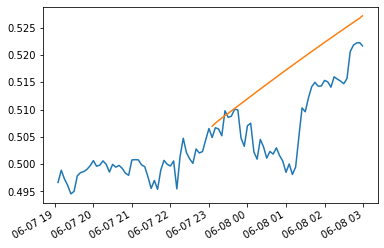

MSE of this prediction is: 9.543352303820311e-05
Epoch: 31 / 1000
loss of batch 0 / 8: 0.00015041976596576152
loss of batch 1 / 8: 0.00017324673330319115
loss of batch 2 / 8: 0.00010167506661490458
loss of batch 3 / 8: 0.00016275270926916304
loss of batch 4 / 8: 0.00018239346820454646
loss of batch 5 / 8: 0.0001127751314862533
loss of batch 6 / 8: 0.00011921940222293441
loss of batch 7 / 8: 9.779182538507206e-05
Plotting prediction for some random sample in the test set.


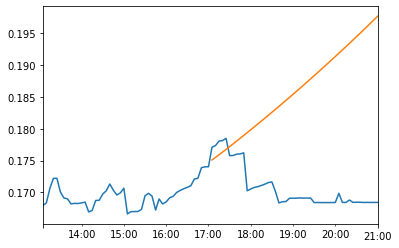

MSE of this prediction is: 0.0003194820203976532
Epoch: 32 / 1000
loss of batch 0 / 8: 0.0001382577932128047
loss of batch 1 / 8: 0.00016002862854084125
loss of batch 2 / 8: 9.437305788276285e-05
loss of batch 3 / 8: 0.00014879035135881923
loss of batch 4 / 8: 0.00016732919920293778
loss of batch 5 / 8: 0.00010449701130667082
loss of batch 6 / 8: 0.00010921346865450198
loss of batch 7 / 8: 9.02392110053615e-05
Plotting prediction for some random sample in the test set.


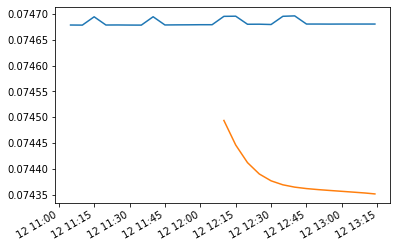

MSE of this prediction is: 9.260844220703209e-08
Epoch: 33 / 1000
loss of batch 0 / 8: 0.00012678491303574156
loss of batch 1 / 8: 0.00014754488515208018
loss of batch 2 / 8: 8.742143476364983e-05
loss of batch 3 / 8: 0.00013567218852328022
loss of batch 4 / 8: 0.00015318325519045483
loss of batch 5 / 8: 9.663053551349489e-05
loss of batch 6 / 8: 9.975561043791827e-05
loss of batch 7 / 8: 8.308298346915736e-05
Plotting prediction for some random sample in the test set.


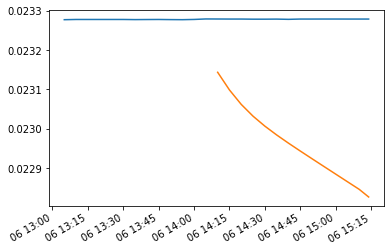

MSE of this prediction is: 1.0819908815086958e-07
Epoch: 34 / 1000
loss of batch 0 / 8: 0.00011595876616657143
loss of batch 1 / 8: 0.00013575907476975053
loss of batch 2 / 8: 8.080277081652702e-05
loss of batch 3 / 8: 0.00012334830634767987
loss of batch 4 / 8: 0.000139896225435717
loss of batch 5 / 8: 8.916111538780243e-05
loss of batch 6 / 8: 9.082396797761383e-05
loss of batch 7 / 8: 7.63142392670062e-05
Plotting prediction for some random sample in the test set.


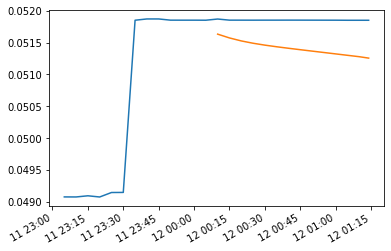

MSE of this prediction is: 2.0462443392701123e-07
Epoch: 35 / 1000
loss of batch 0 / 8: 0.00010575394553997335
loss of batch 1 / 8: 0.00012465478489783025
loss of batch 2 / 8: 7.451540800119963e-05
loss of batch 3 / 8: 0.00011179067863116611
loss of batch 4 / 8: 0.0001274321398329859
loss of batch 5 / 8: 8.208412363572004e-05
loss of batch 6 / 8: 8.241082954530683e-05
loss of batch 7 / 8: 6.993125735105008e-05
Plotting prediction for some random sample in the test set.


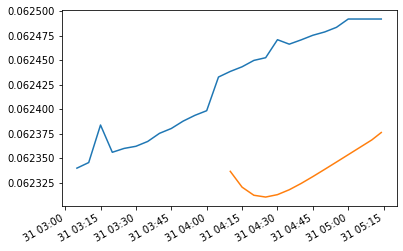

MSE of this prediction is: 1.8365462155964555e-08
Epoch: 36 / 1000
loss of batch 0 / 8: 9.61578292557479e-05
loss of batch 1 / 8: 0.0001142252917023557
loss of batch 2 / 8: 6.856288397098808e-05
loss of batch 3 / 8: 0.00010098357459909811
loss of batch 4 / 8: 0.00011576721216140008
loss of batch 5 / 8: 7.540166769502368e-05
loss of batch 6 / 8: 7.451429314286324e-05
loss of batch 7 / 8: 6.393732001572598e-05
Plotting prediction for some random sample in the test set.


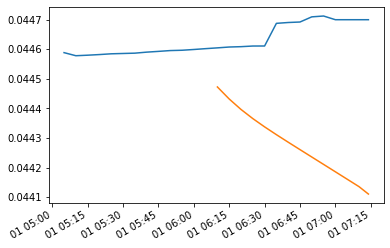

MSE of this prediction is: 1.731316268908827e-07
Epoch: 37 / 1000
loss of batch 0 / 8: 8.716550017711122e-05
loss of batch 1 / 8: 0.00010446932847914244
loss of batch 2 / 8: 6.295267689078258e-05
loss of batch 3 / 8: 9.091847634869633e-05
loss of batch 4 / 8: 0.00010488726507978649
loss of batch 5 / 8: 6.911615304913616e-05
loss of batch 6 / 8: 6.713538571638509e-05
loss of batch 7 / 8: 5.833577335001544e-05
Plotting prediction for some random sample in the test set.


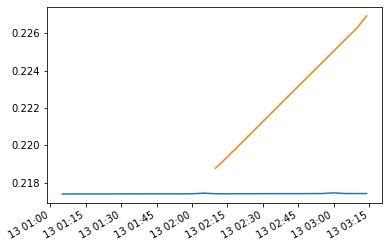

MSE of this prediction is: 3.578492821933524e-05
Epoch: 38 / 1000
loss of batch 0 / 8: 7.877435369085442e-05
loss of batch 1 / 8: 9.538739771133858e-05
loss of batch 2 / 8: 5.769156250440066e-05
loss of batch 3 / 8: 8.159030946088754e-05
loss of batch 4 / 8: 9.478259731489386e-05
loss of batch 5 / 8: 6.323102514873973e-05
loss of batch 6 / 8: 6.027561133882977e-05
loss of batch 7 / 8: 5.3129388799009114e-05
Plotting prediction for some random sample in the test set.


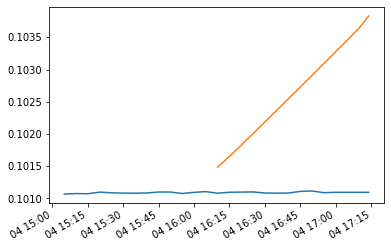

MSE of this prediction is: 2.931821912828225e-06
Epoch: 39 / 1000
loss of batch 0 / 8: 7.098352011118389e-05
loss of batch 1 / 8: 8.698018236027931e-05
loss of batch 2 / 8: 5.278549154165237e-05
loss of batch 3 / 8: 7.299413004409738e-05
loss of batch 4 / 8: 8.54451200506408e-05
loss of batch 5 / 8: 5.7748044962982e-05
loss of batch 6 / 8: 5.393501414894379e-05
loss of batch 7 / 8: 4.831926710456501e-05
Plotting prediction for some random sample in the test set.


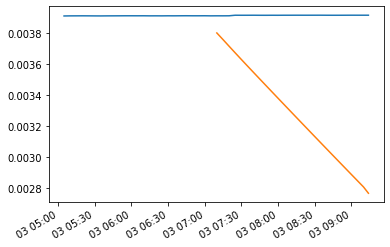

MSE of this prediction is: 5.007837572112219e-07
Epoch: 40 / 1000
loss of batch 0 / 8: 6.37905616701851e-05
loss of batch 1 / 8: 7.924635410118709e-05
loss of batch 2 / 8: 4.8238300587671014e-05
loss of batch 3 / 8: 6.51234823617321e-05
loss of batch 4 / 8: 7.686582946240858e-05
loss of batch 5 / 8: 5.2667267013887125e-05
loss of batch 6 / 8: 4.811148911766178e-05
loss of batch 7 / 8: 4.3904012792561835e-05
Plotting prediction for some random sample in the test set.


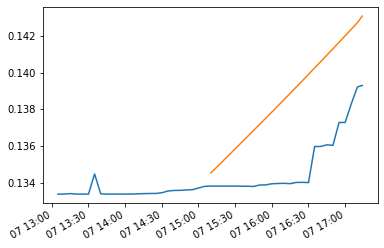

MSE of this prediction is: 1.5497739529737474e-05
Epoch: 41 / 1000
loss of batch 0 / 8: 5.7190974175667976e-05
loss of batch 1 / 8: 7.21809992841856e-05
loss of batch 2 / 8: 4.405131113816512e-05
loss of batch 3 / 8: 5.7968291121741403e-05
loss of batch 4 / 8: 6.903289302610283e-05
loss of batch 5 / 8: 4.798617446792653e-05
loss of batch 6 / 8: 4.27993704321954e-05
loss of batch 7 / 8: 3.987946999718961e-05
Plotting prediction for some random sample in the test set.


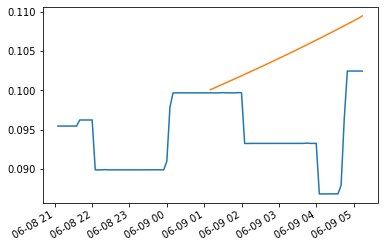

MSE of this prediction is: 0.0001327223062457729
Epoch: 42 / 1000
loss of batch 0 / 8: 5.117644154033274e-05
loss of batch 1 / 8: 6.577462497749568e-05
loss of batch 2 / 8: 4.022280483089072e-05
loss of batch 3 / 8: 5.1513929517515956e-05
loss of batch 4 / 8: 6.193035790694213e-05
loss of batch 5 / 8: 4.369956895779715e-05
loss of batch 6 / 8: 3.7989222846968016e-05
loss of batch 7 / 8: 3.623793659922439e-05
Plotting prediction for some random sample in the test set.


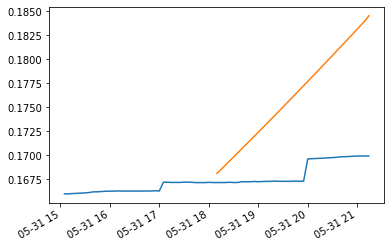

MSE of this prediction is: 7.65182649705178e-05
Epoch: 43 / 1000
loss of batch 0 / 8: 4.5734390228967534e-05
loss of batch 1 / 8: 6.001215897126407e-05
loss of batch 2 / 8: 3.674767958197358e-05
loss of batch 3 / 8: 4.574006436890589e-05
loss of batch 4 / 8: 5.5537111416625173e-05
loss of batch 5 / 8: 3.9799290131973015e-05
loss of batch 6 / 8: 3.366707167305994e-05
loss of batch 7 / 8: 3.2968264156325e-05
Plotting prediction for some random sample in the test set.


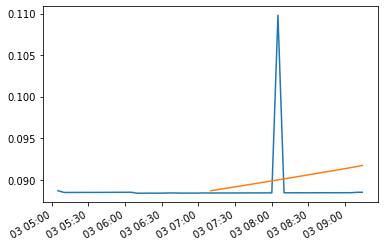

MSE of this prediction is: 1.887741712312589e-05
Epoch: 44 / 1000
loss of batch 0 / 8: 4.0847189303171165e-05
loss of batch 1 / 8: 5.487253143339856e-05
loss of batch 2 / 8: 3.361721846029405e-05
loss of batch 3 / 8: 4.062038441919897e-05
loss of batch 4 / 8: 4.982641761696044e-05
loss of batch 5 / 8: 3.627418689878114e-05
loss of batch 6 / 8: 2.9814567026849437e-05
loss of batch 7 / 8: 3.0055518920051307e-05
Plotting prediction for some random sample in the test set.


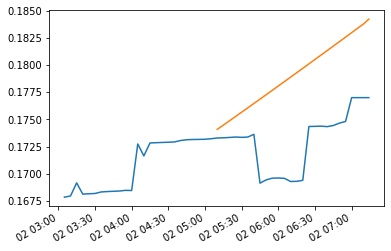

MSE of this prediction is: 4.5324155881808135e-05
Epoch: 45 / 1000
loss of batch 0 / 8: 3.649218650285687e-05
loss of batch 1 / 8: 5.032826223011367e-05
loss of batch 2 / 8: 3.0819016940509994e-05
loss of batch 3 / 8: 3.612234241209646e-05
loss of batch 4 / 8: 4.4765769788789294e-05
loss of batch 5 / 8: 3.311007605319105e-05
loss of batch 6 / 8: 2.6408834773458232e-05
loss of batch 7 / 8: 2.748137063876948e-05
Plotting prediction for some random sample in the test set.


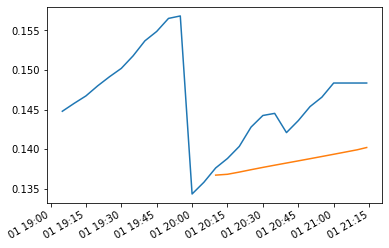

MSE of this prediction is: 4.023628828504592e-05
Epoch: 46 / 1000
loss of batch 0 / 8: 3.2641692191121066e-05
loss of batch 1 / 8: 4.634577867687746e-05
loss of batch 2 / 8: 2.8337087865909335e-05
loss of batch 3 / 8: 3.220766894488245e-05
loss of batch 4 / 8: 4.0317271223415404e-05
loss of batch 5 / 8: 3.028998133508137e-05
loss of batch 6 / 8: 2.3423084214032557e-05
loss of batch 7 / 8: 2.5224261904316767e-05
Plotting prediction for some random sample in the test set.


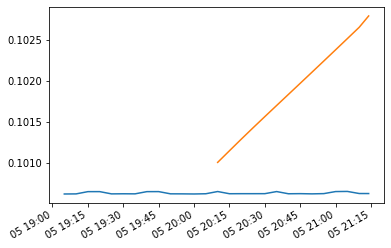

MSE of this prediction is: 1.915349833731221e-06
Epoch: 47 / 1000
loss of batch 0 / 8: 2.926367498782299e-05
loss of batch 1 / 8: 4.288598019999624e-05
loss of batch 2 / 8: 2.6152222242568413e-05
loss of batch 3 / 8: 2.8833029688204528e-05
loss of batch 4 / 8: 3.6438352783029696e-05
loss of batch 5 / 8: 2.7794374541286222e-05
loss of batch 6 / 8: 2.082709024961706e-05
loss of batch 7 / 8: 2.3260173390086645e-05
Plotting prediction for some random sample in the test set.


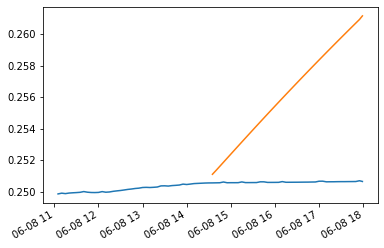

MSE of this prediction is: 4.028529707464313e-05
Epoch: 48 / 1000
loss of batch 0 / 8: 2.6322485261938362e-05
loss of batch 1 / 8: 3.990549171656714e-05
loss of batch 2 / 8: 2.4242593633613365e-05
loss of batch 3 / 8: 2.5951367395135405e-05
loss of batch 4 / 8: 3.308291860354653e-05
loss of batch 5 / 8: 2.5601722757358785e-05
loss of batch 6 / 8: 1.858826628803292e-05
loss of batch 7 / 8: 2.1563337921292863e-05
Plotting prediction for some random sample in the test set.


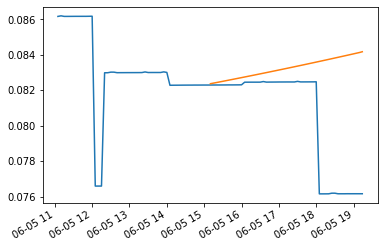

MSE of this prediction is: 1.820421932495158e-05
Epoch: 49 / 1000
loss of batch 0 / 8: 2.3780153143954453e-05
loss of batch 1 / 8: 3.735814497089408e-05
loss of batch 2 / 8: 2.2584611143093793e-05
loss of batch 3 / 8: 2.3513359527577668e-05
loss of batch 4 / 8: 3.0202744872219846e-05
loss of batch 5 / 8: 2.368898905671662e-05
loss of batch 6 / 8: 1.667264360669395e-05
loss of batch 7 / 8: 2.0107299453746267e-05
Plotting prediction for some random sample in the test set.


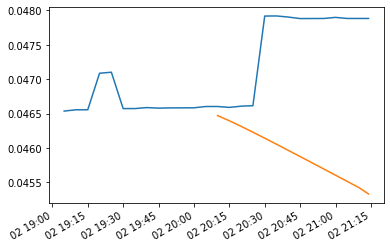

MSE of this prediction is: 3.374414437911531e-06
Epoch: 50 / 1000
loss of batch 0 / 8: 2.159760942202712e-05
loss of batch 1 / 8: 3.5196819634882575e-05
loss of batch 2 / 8: 2.115390727180929e-05
loss of batch 3 / 8: 2.1469264857588302e-05
loss of batch 4 / 8: 2.7749059865744545e-05
loss of batch 5 / 8: 2.203236716472835e-05
loss of batch 6 / 8: 1.5046121010134223e-05
loss of batch 7 / 8: 1.8865855863925646e-05
Plotting prediction for some random sample in the test set.


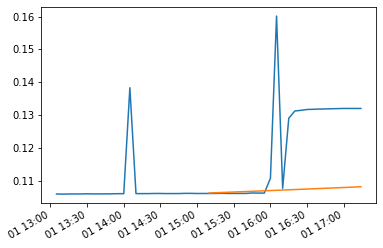

MSE of this prediction is: 0.00039194432214002925
Epoch: 51 / 1000
loss of batch 0 / 8: 1.9736139522161198e-05
loss of batch 1 / 8: 3.337520822059682e-05
loss of batch 2 / 8: 1.9926325374643107e-05
loss of batch 3 / 8: 1.9770572182224234e-05
loss of batch 4 / 8: 2.5674071585881864e-05
loss of batch 5 / 8: 2.060786025651675e-05
loss of batch 6 / 8: 1.3675462608356077e-05
loss of batch 7 / 8: 1.7813949512627467e-05
Plotting prediction for some random sample in the test set.


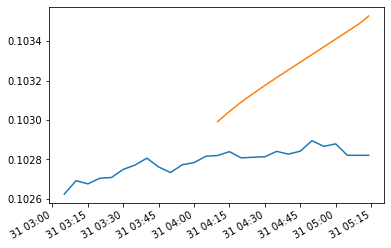

MSE of this prediction is: 2.1363905405180407e-07
Epoch: 52 / 1000
loss of batch 0 / 8: 1.8158488005051694e-05
loss of batch 1 / 8: 3.184938890636604e-05
loss of batch 2 / 8: 1.8878747870631103e-05
loss of batch 3 / 8: 1.837149090905516e-05
loss of batch 4 / 8: 2.3932251769519218e-05
loss of batch 5 / 8: 1.9391907478133716e-05
loss of batch 6 / 8: 1.2529165223645849e-05
loss of batch 7 / 8: 1.6928279444944145e-05
Plotting prediction for some random sample in the test set.


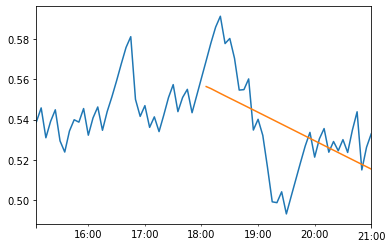

MSE of this prediction is: 0.00044510475593504854
Epoch: 53 / 1000
loss of batch 0 / 8: 1.6829782591492292e-05
loss of batch 1 / 8: 3.0578937079377444e-05
loss of batch 2 / 8: 1.7989639899204984e-05
loss of batch 3 / 8: 1.7229892133670534e-05
loss of batch 4 / 8: 2.248123572077973e-05
loss of batch 5 / 8: 1.836177230325652e-05
loss of batch 6 / 8: 1.157795816908563e-05
loss of batch 7 / 8: 1.6187616271838414e-05
Plotting prediction for some random sample in the test set.


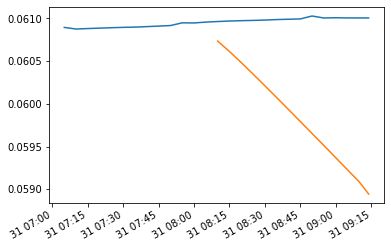

MSE of this prediction is: 1.620782335301697e-06
Epoch: 54 / 1000
loss of batch 0 / 8: 1.571798734091516e-05
loss of batch 1 / 8: 2.9527505603530838e-05
loss of batch 2 / 8: 1.723929407465167e-05
loss of batch 3 / 8: 1.630779041720344e-05
loss of batch 4 / 8: 2.12822861279282e-05
loss of batch 5 / 8: 1.749585927528886e-05
loss of batch 6 / 8: 1.0795039107112755e-05
loss of batch 7 / 8: 1.5572870693411616e-05
Plotting prediction for some random sample in the test set.


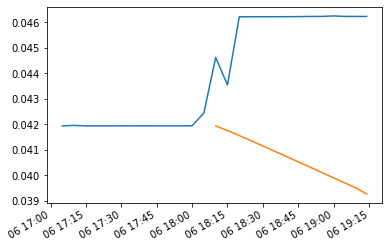

MSE of this prediction is: 3.004956136254034e-05
Epoch: 55 / 1000
loss of batch 0 / 8: 1.4794076287355393e-05
loss of batch 1 / 8: 2.8662951005558053e-05
loss of batch 2 / 8: 1.6609826177095927e-05
loss of batch 3 / 8: 1.5571378723698792e-05
loss of batch 4 / 8: 2.0300422881912487e-05
loss of batch 5 / 8: 1.677388234692122e-05
loss of batch 6 / 8: 1.0156097769596434e-05
loss of batch 7 / 8: 1.506696845032906e-05
Plotting prediction for some random sample in the test set.


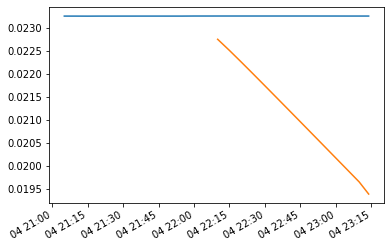

MSE of this prediction is: 5.778648820065546e-06
Epoch: 56 / 1000
loss of batch 0 / 8: 1.4031963352000404e-05
loss of batch 1 / 8: 2.795711851133309e-05
loss of batch 2 / 8: 1.6085043673928165e-05
loss of batch 3 / 8: 1.4990810998520898e-05
loss of batch 4 / 8: 1.9504332602293453e-05
loss of batch 5 / 8: 1.6176986199671815e-05
loss of batch 6 / 8: 9.639233225576323e-06
loss of batch 7 / 8: 1.4654673211887614e-05
Plotting prediction for some random sample in the test set.


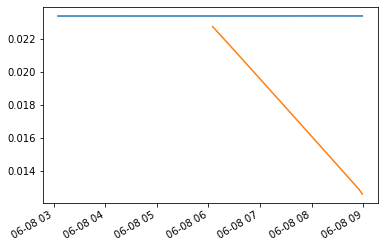

MSE of this prediction is: 4.1722434510334164e-05
Epoch: 57 / 1000
loss of batch 0 / 8: 1.3408334724155824e-05
loss of batch 1 / 8: 2.7385492075924824e-05
loss of batch 2 / 8: 1.5650286608496465e-05
loss of batch 3 / 8: 1.4539895597398762e-05
loss of batch 4 / 8: 1.886620161684794e-05
loss of batch 5 / 8: 1.568784314444836e-05
loss of batch 6 / 8: 9.224854234952885e-06
loss of batch 7 / 8: 1.432241097545565e-05
Plotting prediction for some random sample in the test set.


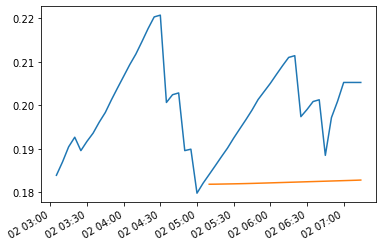

MSE of this prediction is: 0.0003475762790199288
Epoch: 58 / 1000
loss of batch 0 / 8: 1.2902479808163091e-05
loss of batch 1 / 8: 2.692681382075199e-05
loss of batch 2 / 8: 1.5292304666899025e-05
loss of batch 3 / 8: 1.4195793742808975e-05
loss of batch 4 / 8: 1.8361547936474963e-05
loss of batch 5 / 8: 1.5290728107916144e-05
loss of batch 6 / 8: 8.895585229115015e-06
loss of batch 7 / 8: 1.405814286951737e-05
Plotting prediction for some random sample in the test set.


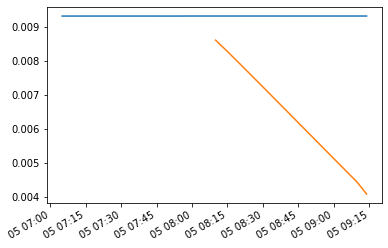

MSE of this prediction is: 1.0782905204152345e-05
Epoch: 59 / 1000
loss of batch 0 / 8: 1.2496141945832677e-05


KeyboardInterrupt: 

In [2]:
tb = bench.TestBench(
    class_to_test=lstm.LSTMTester,
    metrics_and_apps_to_test=[("node_mem", "moc/smaug")],
    path_to_data="./data/"
)
tb.run_training_and_tests()